  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0  -1   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1  -1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   1   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3  -1   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055  
   Rings
0     15
1      7
2      9
3     10
4      7


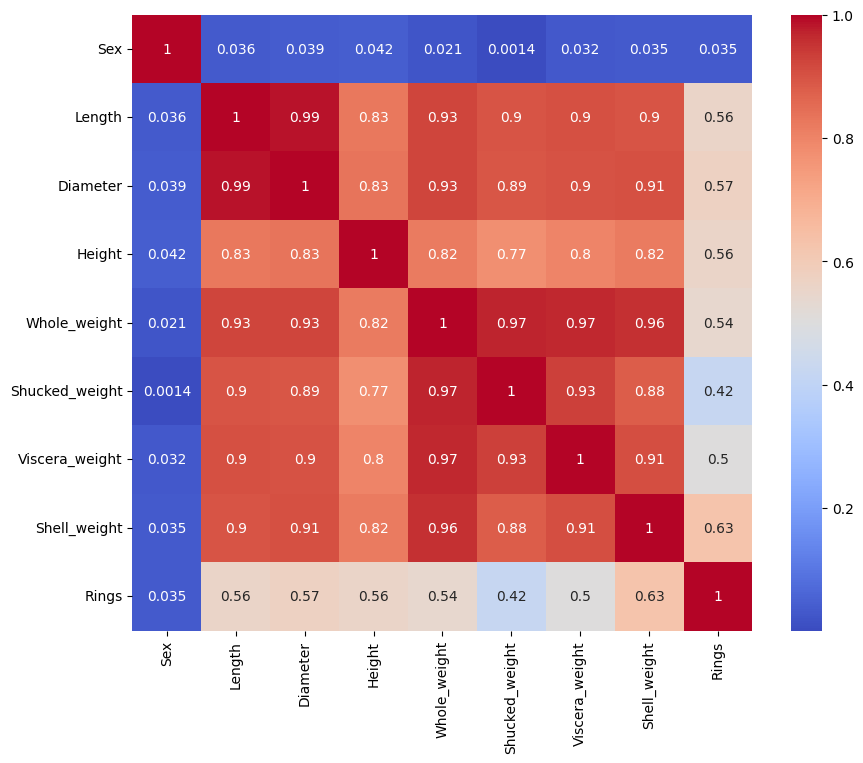

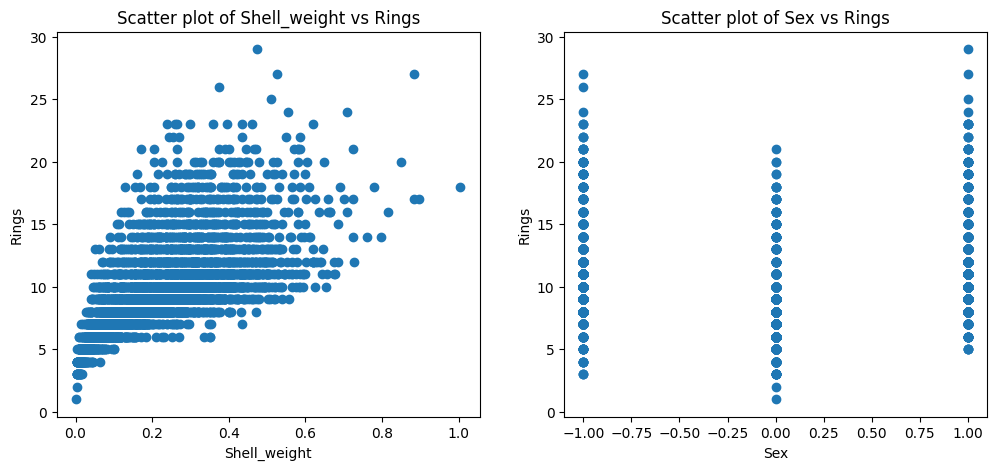

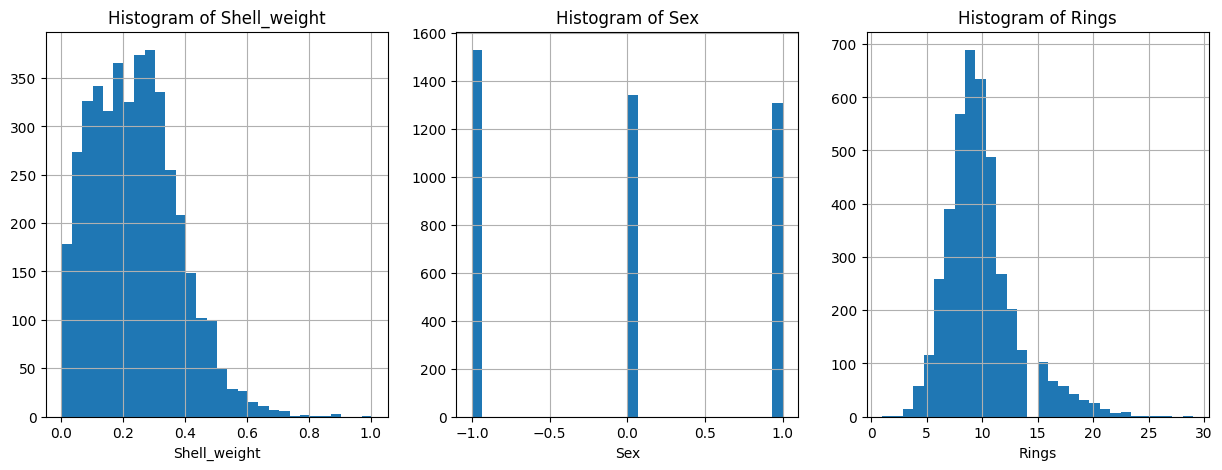

Training set size: 2506
Test set size: 1671
RMSE: 2.2921250505371735
R-squared: 0.4896373355386813


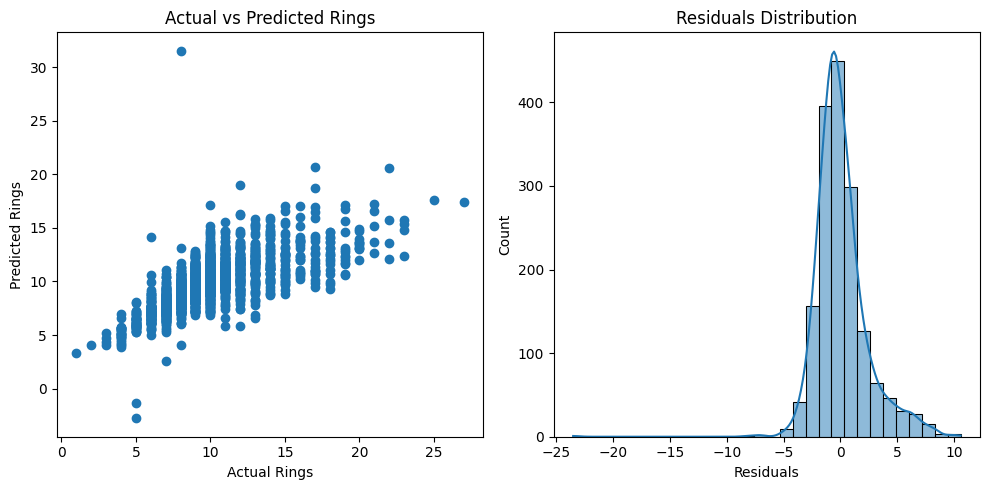

Hidden layers: (50,), Learning rate: 0.01, RMSE: 2.20305117668499, R-squared: 0.528532834188147
Hidden layers: (100,), Learning rate: 0.01, RMSE: 2.1672936793892736, R-squared: 0.5437133001774921
Hidden layers: (50, 50), Learning rate: 0.01, RMSE: 2.0927355154573637, R-squared: 0.5745671997031963
Hidden layers: (100, 50), Learning rate: 0.01, RMSE: 2.2259527490470292, R-squared: 0.5186797170233899
Hidden layers: (50,), Learning rate: 0.001, RMSE: 2.2740989763917283, R-squared: 0.497633112091439
Hidden layers: (100,), Learning rate: 0.001, RMSE: 2.301345301650369, R-squared: 0.485523130347737
Hidden layers: (50, 50), Learning rate: 0.001, RMSE: 2.176010720248021, R-squared: 0.5400354703515493
Hidden layers: (100, 50), Learning rate: 0.001, RMSE: 2.2077772859719316, R-squared: 0.526507828677466
Best model - Hidden layers: (50, 50), Learning rate: 0.01, RMSE: 2.0927355154573637, R-squared: 0.5745671997031963


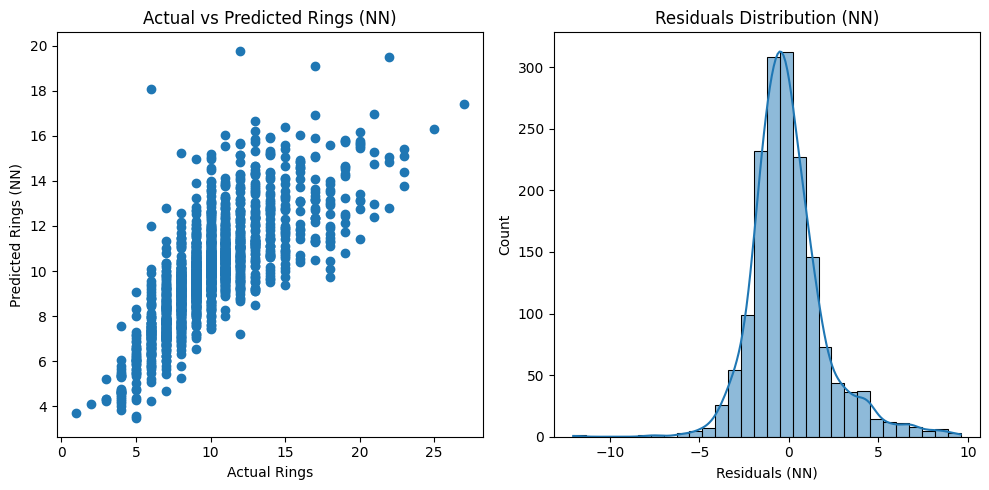

In [3]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

abalone = fetch_ucirepo(id=1) 


# Clean the data (eg. convert M and F to 0 and 1)
abalone['data']['features'].loc[:,'Sex'] = abalone['data']['features']['Sex'].map({'M': -1, 'F': 1, 'I': 0})

# Display few rows of the cleaned data
print(abalone['data']['features'].head())

print(abalone['data']['targets'].head())

merged_data = pd.concat([abalone['data']['features'], abalone['data']['targets']], axis=1)


# Develop a correlation map using a heatmap
corr = merged_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


# Pick two of the most correlated features (positive and negative) and create scatter plots with ring-age
most_pos_corr = corr['Rings'].drop('Rings').idxmax()
most_neg_corr = corr['Rings'].drop('Rings').idxmin()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(abalone['data']['features'][most_pos_corr], abalone['data']['targets']['Rings'])
plt.xlabel(most_pos_corr)
plt.ylabel('Rings')
plt.title(f'Scatter plot of {most_pos_corr} vs Rings')

plt.subplot(1, 2, 2)
plt.scatter(abalone['data']['features'][most_neg_corr], abalone['data']['targets']['Rings'])
plt.xlabel(most_neg_corr)
plt.ylabel('Rings')
plt.title(f'Scatter plot of {most_neg_corr} vs Rings')

plt.show()


# Create histograms of the two most correlated features, and the ring-age
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
abalone['data']['features'][most_pos_corr].hist(bins=30)
plt.xlabel(most_pos_corr)
plt.title(f'Histogram of {most_pos_corr}')

plt.subplot(1, 3, 2)
abalone['data']['features'][most_neg_corr].hist(bins=30)
plt.xlabel(most_neg_corr)
plt.title(f'Histogram of {most_neg_corr}')

plt.subplot(1, 3, 3)
abalone['data']['targets']['Rings'].hist(bins=30)
plt.xlabel('Rings')
plt.title('Histogram of Rings')

plt.show()

# Create a 60/40 train/test split
experiment_number = 1  # Change this for different experiments
X_train, X_test, y_train, y_test = train_test_split(
    abalone['data']['features'], abalone['data']['targets'], test_size=0.4, random_state=experiment_number
)

### Modeling part

experiment_number = 1  # Change this for different experiments

print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')


# Train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = lin_reg.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

# Visualize the model predictions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs Predicted Rings')

plt.subplot(1, 2, 2)
sns.histplot(y_test['Rings'] - y_pred.flatten(), bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')

plt.tight_layout()
plt.show()


# Normalize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model on normalized data
lin_reg_scaled = LinearRegression()
lin_reg_scaled.fit(X_train_scaled, y_train)

# Predict on the test set with normalized data
y_pred_scaled = lin_reg_scaled.predict(X_test_scaled)



# Define a function to train and evaluate the neural network
def train_evaluate_nn(hidden_layer_sizes, learning_rate_init):
    nn = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, solver='sgd', learning_rate_init=learning_rate_init, max_iter=1000, random_state=experiment_number)
    nn.fit(X_train_scaled, y_train.values.ravel())
    y_pred_nn = nn.predict(X_test_scaled)
    rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
    r2_nn = r2_score(y_test, y_pred_nn)
    return rmse_nn, r2_nn

# Trial experiments with different hyperparameters
experiments = [
    {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.01},
    {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01},
    {'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01},
    {'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.01},
    {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001},
    {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001},
    {'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.001},
    {'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001},
]

results = []
for exp in experiments:
    rmse_nn, r2_nn = train_evaluate_nn(exp['hidden_layer_sizes'], exp['learning_rate_init'])
    results.append({'hidden_layer_sizes': exp['hidden_layer_sizes'], 'learning_rate_init': exp['learning_rate_init'], 'rmse': rmse_nn, 'r2': r2_nn})

# Display results
for result in results:
    print(f"Hidden layers: {result['hidden_layer_sizes']}, Learning rate: {result['learning_rate_init']}, RMSE: {result['rmse']}, R-squared: {result['r2']}")

# Select the best model based on RMSE
best_model = min(results, key=lambda x: x['rmse'])
print(f"Best model - Hidden layers: {best_model['hidden_layer_sizes']}, Learning rate: {best_model['learning_rate_init']}, RMSE: {best_model['rmse']}, R-squared: {best_model['r2']}")

# Train and visualize the best neural network model
nn_best = MLPRegressor(hidden_layer_sizes=best_model['hidden_layer_sizes'], solver='sgd', learning_rate_init=best_model['learning_rate_init'], max_iter=1000, random_state=experiment_number)
nn_best.fit(X_train_scaled, y_train.values.ravel())
y_pred_nn_best = nn_best.predict(X_test_scaled)

# Visualize the best neural network model predictions
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_nn_best)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings (NN)')
plt.title('Actual vs Predicted Rings (NN)')

plt.subplot(1, 2, 2)
sns.histplot(y_test['Rings'] - y_pred_nn_best.flatten(), bins=30, kde=True)
plt.xlabel('Residuals (NN)')
plt.title('Residuals Distribution (NN)')

plt.tight_layout()
plt.show()